Deep learning framework -- pytorch

In [1]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.2.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.17.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.2.1-cp311-cp311-win_amd64.whl (198.6 MB)
Using cached torchvision-0.17.1-cp311-cp311-win_amd64.whl (1.2 MB)
Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached filelock-3.13.1-py3-none-any.whl (11 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121


pytorch version

In [51]:
import torch
print("Using torch", torch.__version__)

Using torch 2.2.1+cu121


In [52]:
print("CUDA Available: ",torch.cuda.is_available())

CUDA Available:  True


Use gpu or not?

In [53]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [54]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Computing gradients for

y = x1 + x2

dy/dx1

dy/dx2

1D data

In [5]:
x1 = torch.rand(1, 1)
x2 = torch.rand(1, 1)
print(x1.requires_grad)
print(x2.requires_grad)

y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

False
False
X1 tensor([[0.0623]])
X2 tensor([[0.2929]])
Y tensor([[0.3552]])


The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [6]:
x1 = torch.rand(1, 1, requires_grad=True)
x2 = torch.rand(1, 1, requires_grad=True)
print(x1.requires_grad)
print(x2.requires_grad)

y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

True
True
X1 tensor([[0.3389]], requires_grad=True)
X2 tensor([[0.0639]], requires_grad=True)
Y tensor([[0.4027]], grad_fn=<AddBackward0>)


In [7]:
y.backward()

Recall y = x1+x2

dy/dx1 = 1

dy/dx2 = 1


In [9]:
print(x1.grad)
print(x2.grad)

tensor([[1.]])
tensor([[1.]])


y = x1+x2

2D data

m=mean(y)

In [20]:
x1 = torch.rand(1, 2, requires_grad=True)
x2 = torch.rand(1, 2, requires_grad=True)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.0472, 0.0897]], requires_grad=True)
X2 tensor([[0.0811, 0.9281]], requires_grad=True)
Y tensor([[0.1284, 1.0178]], grad_fn=<AddBackward0>)


In [21]:
m = y.mean()
print(m)

tensor(0.5731, grad_fn=<MeanBackward0>)


In [22]:
m.backward()

f = (x+y)z

df/dx

df/dy

df/dz

In [23]:
x = torch.rand(1, 1, requires_grad=True)
y = torch.rand(1, 1, requires_grad=True)
z = torch.rand(1, 1, requires_grad=True)
# Only float tensors can have gradients
print("X", x)
print("Y", y)
print("Z", z)

X tensor([[0.1819]], requires_grad=True)
Y tensor([[0.2817]], requires_grad=True)
Z tensor([[0.0628]], requires_grad=True)


In [25]:
f = (x+y) * z
print("f", f)

f tensor([[0.0291]], grad_fn=<MulBackward0>)


In [26]:
f.backward()

In [15]:
print(x.grad)
print(y.grad)
print(z.grad)

tensor([[0.4430]])
tensor([[0.4430]])
tensor([[0.6863]])


f = (x+y)z

3D

In [27]:
x = torch.rand(1, 3, requires_grad=True)
y = torch.rand(1, 3, requires_grad=True)
z = torch.rand(1, 3, requires_grad=True)
# Only float tensors can have gradients
print("X", x)
print("Y", y)
print("Z", z)

X tensor([[0.5753, 0.5420, 0.0205]], requires_grad=True)
Y tensor([[0.0074, 0.1515, 0.4673]], requires_grad=True)
Z tensor([[0.2046, 0.2071, 0.9426]], requires_grad=True)


f = (x+y) * z

In [28]:
f = (x+y) * z
print("f", f)

f tensor([[0.1192, 0.1437, 0.4598]], grad_fn=<MulBackward0>)


In [29]:
g = f.sum()
print(g)

tensor(0.7227, grad_fn=<SumBackward0>)


In [19]:
g.backward()

In [20]:
print(x.grad)
print(y.grad)
print(z.grad)

tensor([[0.0160, 0.6838, 0.3509]])
tensor([[0.0160, 0.6838, 0.3509]])
tensor([[1.1946, 1.1201, 1.6076]])


Deep learning

Step 1, download datasets

Step 2, create a deep neural network

--two functions: init and forward

Step 3, train the network

Step 4, test the network

In [36]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [37]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True

Download datasets: the training dataset and testing dataset.

In [68]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

Show images

Label: 6


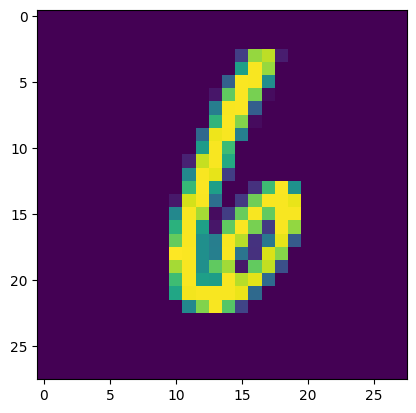

In [69]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

plt.imshow(images[0,0, :])

print(f"Label: {labels[0]}")




Label: 0


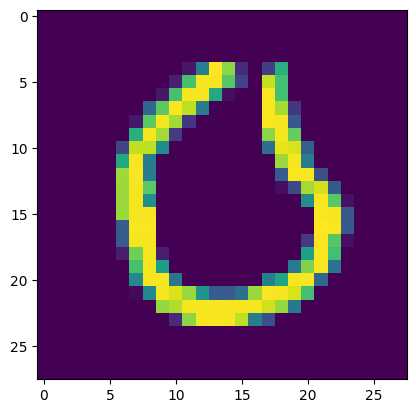

In [70]:
images, labels = next(iter(test_loader))

plt.imshow(images[0,0, :])

print(f"Label: {labels[0]}")

Create a deep neural network

In [86]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x)) # relu: activation function
        x = self.fc2(x)
        return x

net = Net()


Training and testing functions

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


In [82]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss))

print('Finished Training')

[1] loss: 15.090
[2] loss: 13.646
[3] loss: 12.497
[4] loss: 11.516
[5] loss: 10.683
[6] loss: 9.965
[7] loss: 9.317
[8] loss: 8.744
[9] loss: 8.242
[10] loss: 7.785
Finished Training


In [92]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# If you have multiple GPUs, wrap your model with nn.DataParallel to use data parallelism
if torch.cuda.device_count() > 1:
    net = nn.DataParallel(net)

net.to(device)

# Increase the batch size
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size']*8, shuffle=True, **kwargs)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss))

print('Finished Training')

cuda:0
[1] loss: 0.589
[2] loss: 0.579
[3] loss: 0.570


KeyboardInterrupt: 

In [93]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [94]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


Use convolutional layers.

In [95]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        # Convolutional layer (sees 28x28x1 image tensor)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        # Convolutional layer (sees 14x14x32 tensor after pooling)
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 2)
        # Fully connected layer (sees 7x7x64 tensor after pooling)
        self.fc1 = nn.Linear(64 * 7 * 7, 1000)
        # Final fully connected layer
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        # Add sequence of convolutional and max pooling layers
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        # Flatten image input
        x = x.view(-1, 64 * 7 * 7)
        # Add dropout layer
        x = F.dropout(x, 0.5, training=self.training)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add 2nd hidden layer, with 10 output units for 10 classes
        x = self.fc2(x)
        return x


Training and testing functions

In [96]:
net = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [79]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss))

print('Finished Training')

[1] loss: 22.038
[2] loss: 4.862
[3] loss: 3.362
[4] loss: 2.557
[5] loss: 2.194
[6] loss: 1.917
[7] loss: 1.699
[8] loss: 1.447
[9] loss: 1.345
[10] loss: 1.073
Finished Training


In [97]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # inputs, labels = data
        images, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss))

print('Finished Training')

ValueError: Expected input batch_size (8000) to match target batch_size (4000).

In [80]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %
